In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Loading the train-dataset.

In [2]:
df = pd.read_csv("../data/train.csv")
df.head(2)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


## 2. Seprating the data into dependent and independent columns.

In [3]:
x = df.drop(columns=["id","target"])
y = df.target
print("Shape of input data: ", x.shape)
print("*"*50)
print("Shape of target data: ", y.shape)
print("*"*50)
print("Unique values in the target: ", y.unique())

Shape of input data:  (250, 300)
**************************************************
Shape of target data:  (250,)
**************************************************
Unique values in the target:  [1. 0.]


### Observation(s):
- There are 250 samples which contains 300 columns/features.
- In the target data, there are two unique classes/labels. So, it is a binary classifiation problem.

## 3. Understanding the columns/features of the data.

In [4]:
desciption_of_x = x.describe()
desciption_of_x

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,-0.643500,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,-0.012500,0.052000,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,0.635000,0.733000,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,2.512000,2.959000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 586.1 KB
None
**************************************************




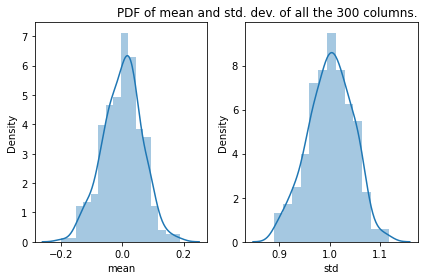

In [8]:
print(x.info())
print("*"*50)
print()
print()
f, axs = plt.subplots(1, 2)

sns.distplot(desciption_of_x.loc["mean"],ax=axs[0])

sns.distplot(desciption_of_x.loc["std"],ax=axs[1])
plt.title("PDF of mean and std. dev. of all the 300 columns.",loc="right")
plt.tight_layout()

plt.show()

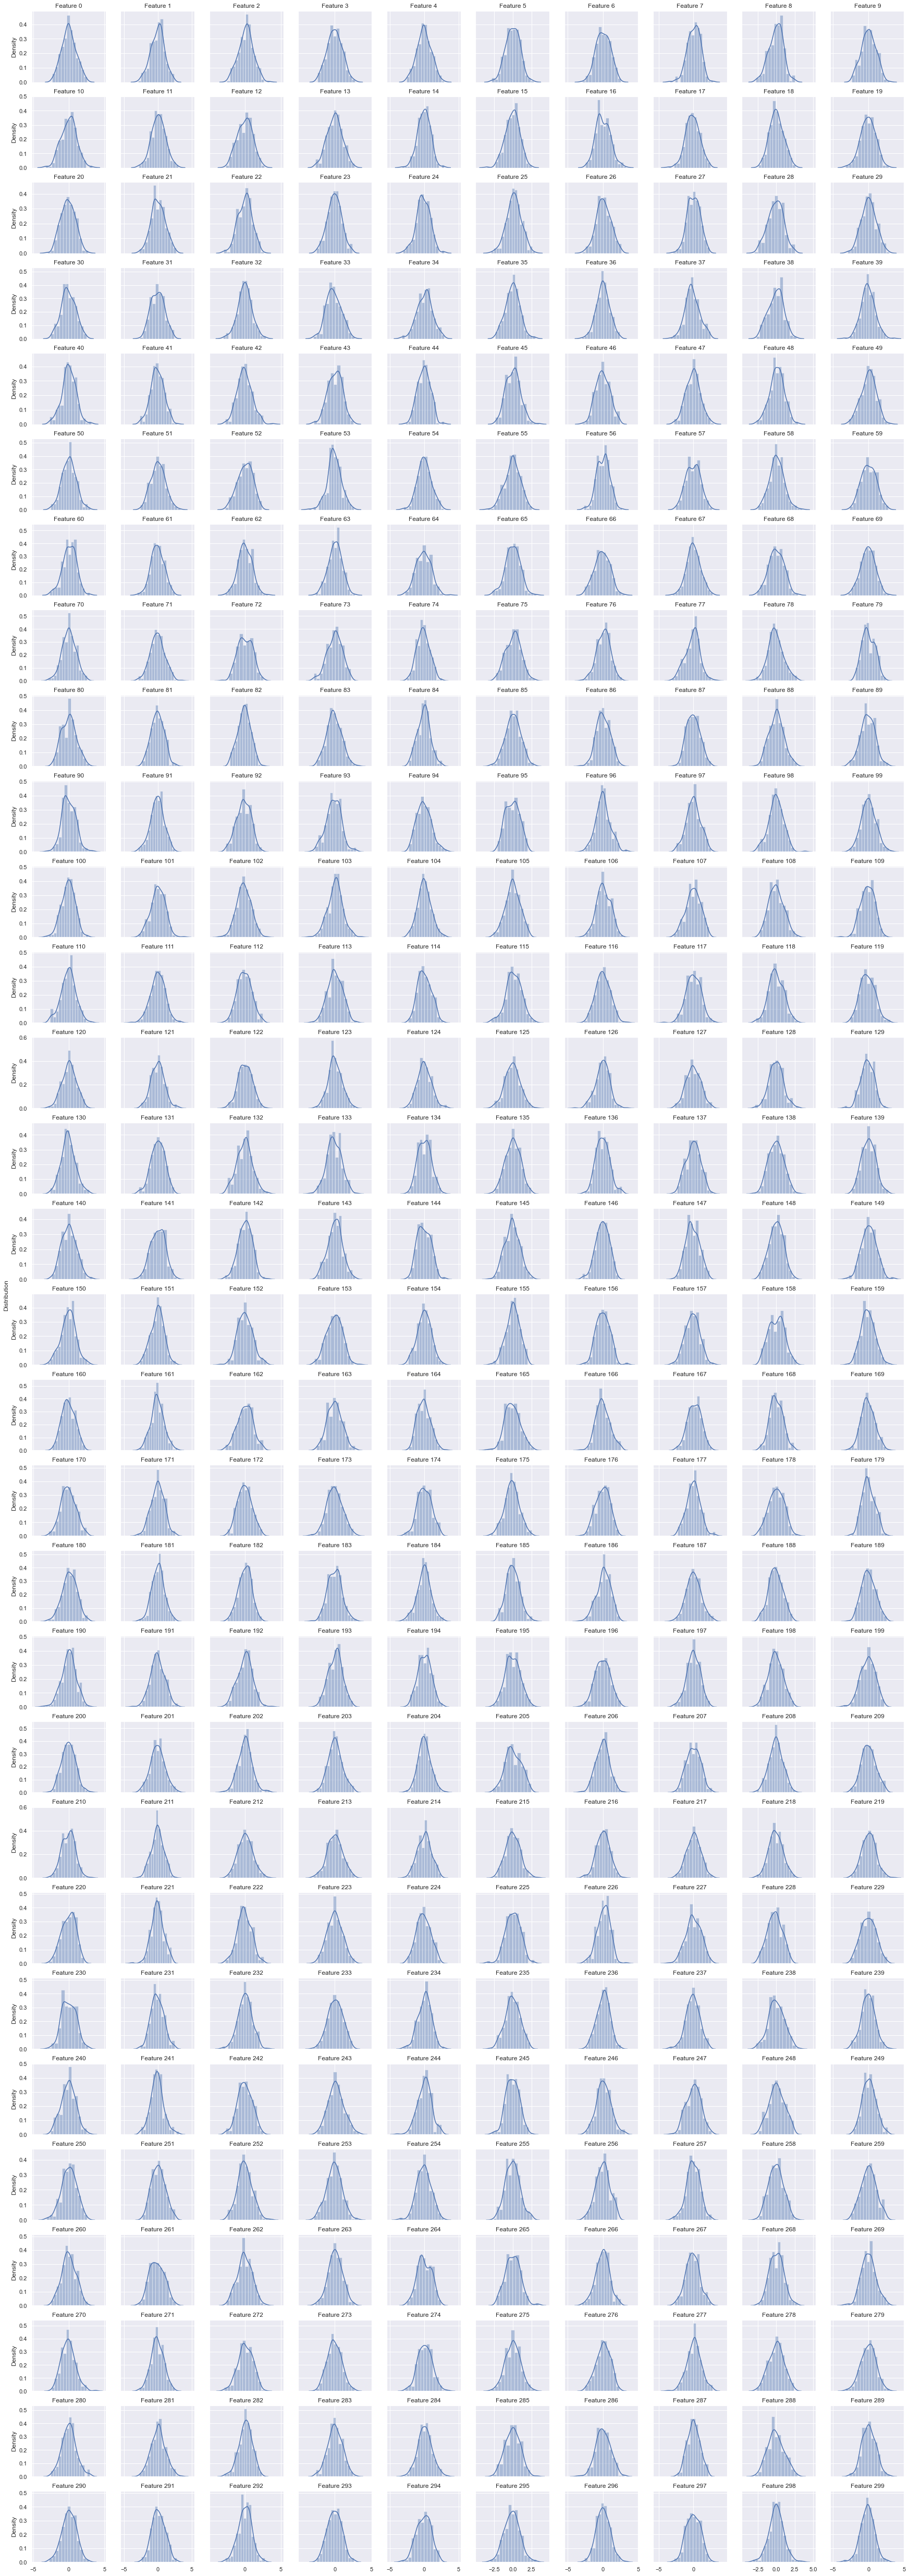

In [216]:
sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
fig.text(0.1, 0.5, s='Distribution', va='center', rotation='vertical')
ax = ax.reshape(-1)
for i, col in enumerate(x.columns):
    axe= sns.distplot(np.array(x[col]), ax=ax[i])
    ax[i].set_title('Feature '+col)
plt.show()

### Observation(s)

- All the 300 columns/features are continous values and their distribution looks almost identical.
- All columns have mean of 0.0 +/- 0.2 
- All columns have std. dev. of 1.0 +/- 0.1.
- So, we can say data is almost standardized.


## 4. Checking Missing/Nan values and duplicates.

In [6]:
print("Number of missing values in the value: ", x.isna().values.any().sum())
print("*"*100)
print("Number of NAN values in the data: ", x.isna().values.any().sum())
print("*"*100)
print("Number of duplicate rows in the data: ", x.duplicated().any().sum())

Number of missing values in the value:  0
****************************************************************************************************
Number of NAN values in the data:  0
****************************************************************************************************
Number of duplicate rows in the data:  0


## 5. Checking if the data is balance or not.

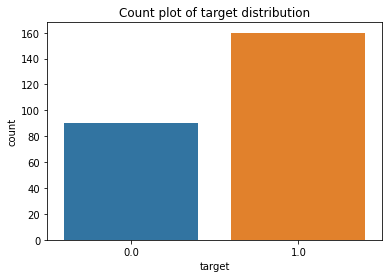

****************************************************************************************************
Percentage of dataset with class label 0:  36.0 %
Percentage of dataset with class label 1:  64.0 %


In [7]:
unique_val_count = y.value_counts()

plt.title("Count plot of target distribution")
sns.countplot(df.target,data=df)
plt.show()


print("*"*100)
print("Percentage of dataset with class label 0: ",(unique_val_count[0]/(unique_val_count[0] + unique_val_count[1]))*100,"%")
print("Percentage of dataset with class label 1: ",(unique_val_count[1]/(unique_val_count[0] + unique_val_count[1]))*100,"%")


### Obserevation(s):

- There is moderate imbalance in the dataset as data points belong to class label 0 is 36% and data points belong to class label is 64%.

## 6. Visualzing the data into 2-D using T-sne

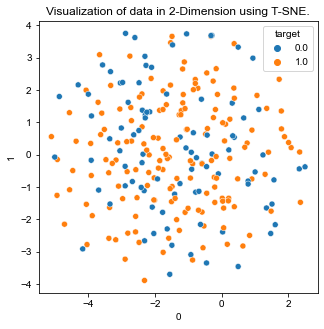

In [8]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(x)


fig = plt.figure(figsize=(5,5))

tsne_df = pd.DataFrame(projections)
tsne_df["target"] = y
sns.scatterplot(data = tsne_df, x = 0, y = 1, hue = "target")
sns.set(style = "darkgrid")
plt.title("Visualization of data in 2-Dimension using T-SNE.")
plt.show()

### Observation(s):
- From the above plot it is clearly visible, data for both class labels are highly overlapping.

## 7. Correlation between the features.

In [9]:
# getting the pearson correlation coffecient between all features.
corr = x.corr()

# selecting the features who has correlation greater than 0.3 or less than -0.3 with other features.

count = 0
corr_dict = {}
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i!=j and abs(corr.iloc[i,j])>0.3:
            count+=1
            corr_dict[i] = (j,corr.iloc[i,j])
            
print("Number of features who has correlation(greater than 0.3 or less than -0.3) with other feature is:", count)
if count:
    for i,j in corr_dict.items():
        print("feature: {0} has correlation of {1} with feature {2}".format(i,j[1],j[0]))

Number of features who has correlation(greater than 0.3 or less than -0.3) with other feature is: 0


### Observation(s)
- All the 300 features are not as much correlated with each other as there are no two features whose correlation coffecient is greater than 0.3 or less than -0.3.
- So, we have no strong correlated features which we could drop.

## 8. Correlation of featues with the dependent variable/ target/outcome.

Number of features who has correlation(greater than 0.2 or less than -0.2) with the target is: 3
****************************************************************************************************
feature: 33 which has correlation of 0.37360840797931905 with the target. 
feature: 65 which has correlation of 0.2938463193509699 with the target. 
feature: 217 which has correlation of -0.20721483015844797 with the target. 
****************************************************************************************************
****************************************************************************************************
Number of featues which has almost zero correlation coffecient with the target. 148


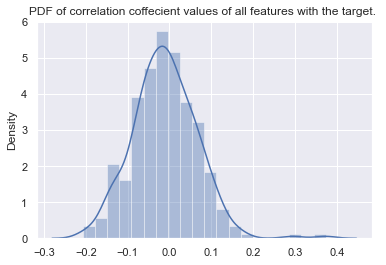

In [10]:
# getting the pearson correlation coffecient between all features and target

corr = df.drop(columns=["id"]).corr()
correlation_with_target = corr.target[1:].values

# selecting the features who has correlation greater than 0.2 or less than -0.2 with the target.

count=0
features_corr = dict()
for i in range(len(correlation_with_target)):
    if abs(correlation_with_target[i]) > 0.2:
        features_corr[i] = correlation_with_target[i]
        count+=1

print("Number of features who has correlation(greater than 0.2 or less than -0.2) with the target is:", count)
print("*"*100)
if count:
    for i,j in features_corr.items():
        print("feature: {0} which has correlation of {1} with the target. ".format(i,j))

print("*"*100)
print("*"*100)
sns.distplot(correlation_with_target)
plt.title("PDF of correlation coffecient values of all features with the target. ")

print("Number of featues which has almost zero correlation coffecient with the target.",
      len([i for i in correlation_with_target if np.around(i,1)==0]))

### Observation(s):

- There are three features(33,65,217) who has correlation(greater than 0.2 or less than -0.2) with the target.
- So, these three features are most important features in the dataset in explaining the target.
- And there are 148 featues who has almost zero-correlation coffecient with the target. So, we can drop these 148 features.

### 8.1  Pairplot of three features (33, 65, 217) who have highest correlation with the target.

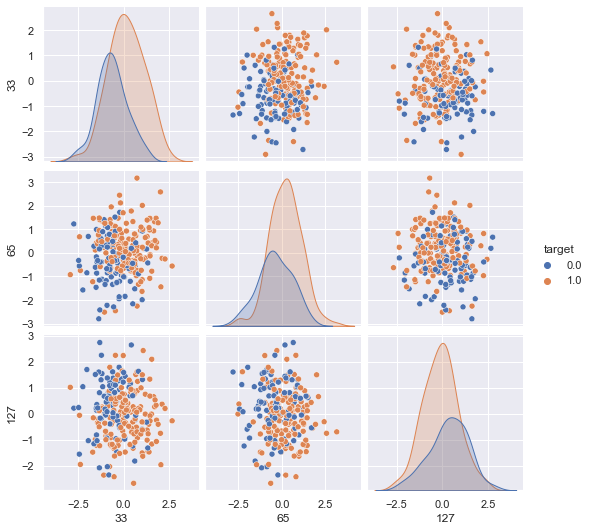

In [11]:
new_df = pd.DataFrame({"33":x.iloc[:,33], "65":x.iloc[:,65],"127":x.iloc[:,217],
                     "target":y})
sns.pairplot(new_df,hue="target")
plt.show()

### Observation(s)

-  We can observe that by looking at the uni-variate distribution of each of the three features which are highly correlated with the target, we can seprate the class label 1 from class label 0 using simple if-else conditions as there are less overlapping in between these two classes.

### 8.2 3-d Scatter plot between three highly correlated features(33,65, 127) with the target.

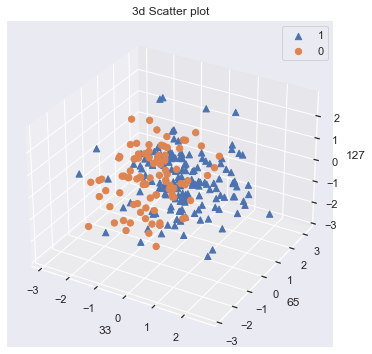

In [12]:

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.grid()
X_ones = x.iloc[:,33][y==1].values
Y_ones = x.iloc[:,65][y==1].values
Z_ones= x.iloc[:,127][y==1].values

X_zeros = x.iloc[:,33][y==0].values
Y_zeros = x.iloc[:,65][y==0].values
Z_zeros= x.iloc[:,127][y==0].values


ax.set_xlabel("33")
ax.set_ylabel("65")
ax.set_zlabel("127")

for m,X,Y,Z in [("^",X_ones,Y_ones,Z_ones),("o",X_zeros,Y_zeros,Z_zeros)]:
    ax.scatter(X, Y, Z,marker =m, alpha=1,s=40,label =m)
plt.title("3d Scatter plot")
plt.legend([1,0])
plt.show()

### Observation(s):

- We can clearly observe from the above 3d scatter plot between the three highly correalted featues with the target is we can easily find a hyperplane that can seprate the class label 1 from class label 0.

## 9. Outlier Detection

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

clf = LocalOutlierFactor()
pred = clf.fit_predict(x)

print("Number of outliers detected  in the dataset using Local Outlier Factor technique: ",len([-1 for i in pred if i==-1]))
print("*"*100)
clf = IsolationForest( n_estimators=50,random_state=0).fit(x)
pred = clf.predict(x)

print("Number of outliers detected  in the dataset using Isolation Forest technique: ",len([-1 for i in pred if i==-1]))


Number of outliers detected  in the dataset using Local Outlier Factor technique:  0
****************************************************************************************************
Number of outliers detected  in the dataset using Isolation Forest technique:  0


### Observation(s):

- No outlier detected using local outlier factor and IsolationForest technique.

In [ ]:
## 